In [28]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import math

In [29]:
directorio = "./Eventos/"
dataframes = []

for archivo in os.listdir(directorio):
    if archivo.endswith('.json'):
        ruta_archivo = os.path.join(directorio, archivo)
        # Lee el archivo y lo agrega a la lista de DataFrames
        # df = pd.read_csv(ruta_archivo)
        df = pd.read_json(ruta_archivo)
        dataframes.append(df)
        
dataset_completo = pd.concat(dataframes, ignore_index=True)

dataset_normalizado = pd.json_normalize(dataset_completo['Events'])

dataset_final = pd.concat([dataset_completo.drop(columns=['Events']), dataset_normalizado], axis=1)
dataset_final = dataset_final.dropna(subset=['Event_ID'])
dataset_final

,Event_ID,Event_Type,Session_ID,Timestamp,CurrentLevel
0,f26c00bb-080c-40e8-bedd-c8ef61a2899c,SessionStartEvent,1a0eddb1-90ea-4ae2-b82e-3088a0c3ee05,1.713608e+09,NaN
1,d212ff87-0584-4c40-b6c5-a3b31692aaa7,SessionEndEvent,1a0eddb1-90ea-4ae2-b82e-3088a0c3ee05,1.713608e+09,NaN
2,73d103b0-ba39-4279-b503-6e356da82e8e,SessionStartEvent,559bf2e4-f5eb-4ab7-8717-b623568c3fb5,1.713608e+09,NaN
3,a8a9c401-ff75-4d69-ae6f-226f763ecfb3,SessionEndEvent,559bf2e4-f5eb-4ab7-8717-b623568c3fb5,1.713608e+09,NaN
5,13f57af3-3965-456a-b018-685af3689cd4,SessionStartEvent,07167aac-d4eb-4042-87a4-e932875924ad,1.713609e+09,NaN
...,...,...,...,...,...
296,87bd18d3-8778-4dcf-a549-9449cf011648,ClickBornEvent,d90343a9-f1e3-40b7-99f0-143e20b766f4,1.713883e+09,6.0
297,b5460f04-483f-4014-a24e-b16b78dc927a,ClickGoEvent,d90343a9-f1e3-40b7-99f0-143e20b766f4,1.713883e+09,6.0
298,905c8de8-1ad5-4350-b441-fc6c8262c8fd,EndLevelEvent,d90343a9-f1e3-40b7-99f0-143e20b766f4,1.713883e+09,6.0
299,06db0823-6f46-4b7f-8daf-3a204cdbf6cb,InitLevelEvent,d90343a9-f1e3-40b7-99f0-143e20b766f4,1.713883e+09,7.0


# Distribución de las veces que hace click un jugador sobre un conejo no nacido en cada nivel.


In [30]:
def count_click_ranges(level_data):
    counts = {'0-2': 0, '3-5': 0, '6+': 0}
    for value in level_data:
        if value <= 3:
            counts['0-2'] += 1
        elif value <= 6:
            counts['3-5'] += 1
        else:
            counts['6+'] += 1
    return counts

CurrentLevel                          1.0  2.0  3.0  4.0  5.0  6.0
Session_ID                                                        
07167aac-d4eb-4042-87a4-e932875924ad  2.0  1.0  0.0  0.0  0.0  0.0
2bee8693-86db-4787-9cdb-14e3a884571a  0.0  0.0  0.0  1.0  3.0  4.0
a52691db-134d-46a3-b4e3-1384567c7918  2.0  1.0  3.0  0.0  0.0  0.0
d90343a9-f1e3-40b7-99f0-143e20b766f4  1.0  1.0  1.0  0.0  0.0  1.0
e68c4016-6732-42df-a90f-3c489b10b0d0  1.0  1.0  1.0  7.0  3.0  3.0


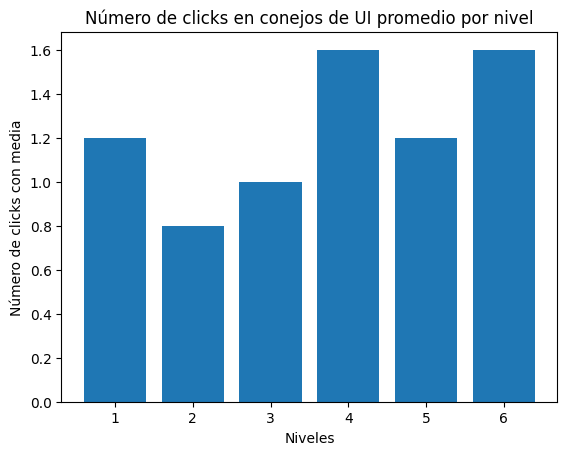

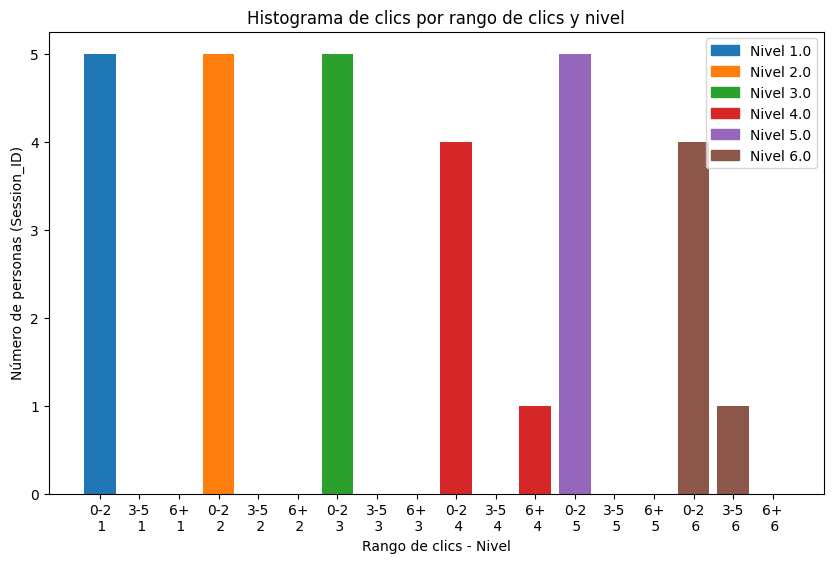

In [31]:

# Filtrar solo las filas que contienen el evento "ClickUIRabbitEvent"
df_click_events = dataset_final[dataset_final['Event_Type'] == 'ClickUIRabbitEvent']

# Agrupar por Event_ID y CurrentLevel y contar el número de repeticiones de "ClickUIRabbitEvent"
df_counts = df_click_events.groupby(['Session_ID', 'CurrentLevel']).size().reset_index(name='Counts')

# Cambiar la forma de la tabla para tener Event_ID como filas y CurrentLevel como columnas
df_pivot = df_counts.pivot(index='Session_ID', columns='CurrentLevel', values='Counts').fillna(0)
print (df_pivot)
mean_clicks = df_pivot.iloc[:, 0:].mean()

# Graficar
plt.bar(mean_clicks.index.astype(float), mean_clicks.values)
plt.xlabel('Niveles')
plt.ylabel('Número de clicks con media')
plt.title('Número de clicks en conejos de UI promedio por nivel')
plt.xticks(mean_clicks.index.astype(float))
plt.show()


# Graficar histogramas para cada nivel
colors = plt.cm.tab10.colors  # Colores para cada nivel
plt.figure(figsize=(10, 6))  # Tamaño de la figura
legend_patches = []
for i, level in enumerate(df_pivot.columns):
    counts = count_click_ranges(df_pivot[level])
    plt.bar([f'{range_}\n {math.trunc(level)}' for range_ in counts.keys()], counts.values(), color=colors[i])
    legend_patches.append(Patch(color=colors[i], label=f'Nivel {level}'))
plt.xlabel('Rango de clics - Nivel')
plt.legend(handles=legend_patches)
plt.ylabel('Número de personas (Session_ID)')
plt.title('Histograma de clics por rango de clics y nivel')
plt.show()


# Distribución de las veces que hacen clicks los jugadores sobre un conejo ya spawneado en cada nivel.

CurrentLevel                          1.0  2.0  4.0  5.0  6.0
Session_ID                                                   
07167aac-d4eb-4042-87a4-e932875924ad  4.0  0.0  0.0  0.0  0.0
2bee8693-86db-4787-9cdb-14e3a884571a  0.0  1.0  0.0  8.0  4.0
a52691db-134d-46a3-b4e3-1384567c7918  1.0  0.0  4.0  0.0  0.0
e68c4016-6732-42df-a90f-3c489b10b0d0  0.0  0.0  0.0  2.0  2.0


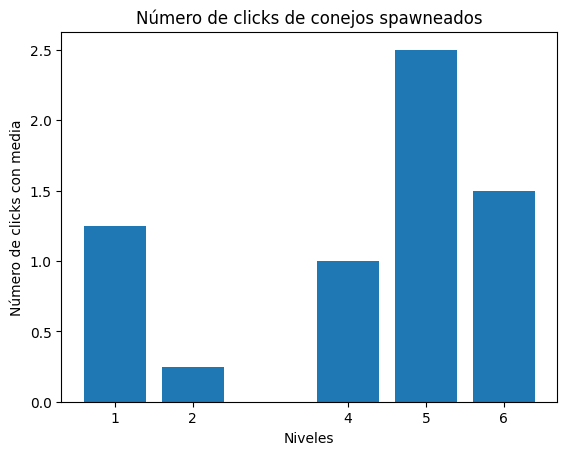

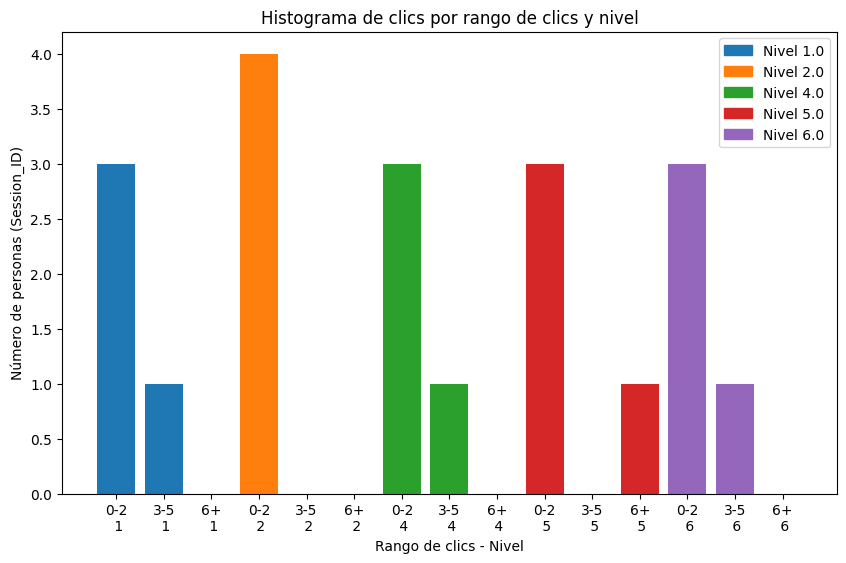

In [32]:

# Filtrar solo las filas que contienen el evento "ClickSpawnedRabbitEvent"
df_click_events = dataset_final[dataset_final['Event_Type'] == 'ClickSpawnedRabbitEvent']

# Agrupar por Event_ID y CurrentLevel y contar el número de repeticiones de "ClickSpawnedRabbitEvent"
df_counts = df_click_events.groupby(['Session_ID', 'CurrentLevel']).size().reset_index(name='Counts')

# Cambiar la forma de la tabla para tener Event_ID como filas y CurrentLevel como columnas
df_pivot = df_counts.pivot(index='Session_ID', columns='CurrentLevel', values='Counts').fillna(0)
print (df_pivot)
mean_clicks = df_pivot.iloc[:, 0:].mean()

# Graficar
plt.bar(mean_clicks.index.astype(float), mean_clicks.values)
plt.xlabel('Niveles')
plt.ylabel('Número de clicks con media')
plt.title('Número de clicks de conejos spawneados')
plt.xticks(mean_clicks.index.astype(float))
plt.show()


# Graficar histogramas para cada nivel
colors = plt.cm.tab10.colors  # Colores para cada nivel
plt.figure(figsize=(10, 6))  # Tamaño de la figura
legend_patches = []
for i, level in enumerate(df_pivot.columns):
    counts = count_click_ranges(df_pivot[level])
    plt.bar([f'{range_}\n {math.trunc(level)}' for range_ in counts.keys()], counts.values(), color=colors[i])
    legend_patches.append(Patch(color=colors[i], label=f'Nivel {level}'))
plt.xlabel('Rango de clics - Nivel')
plt.legend(handles=legend_patches)
plt.ylabel('Número de personas (Session_ID)')
plt.title('Histograma de clics por rango de clics y nivel')
plt.show()
